In [1]:
import torch
import numpy as np
from ANN_model import Features12_NN, Features12_NN2
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

c:\Users\smcmlab4\Anaconda3\envs\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BATCH_SIZE = 128
RANDOM_STATE = 42
CLEANED = True

if CLEANED:
    X = np.load('Numeric_feature_dataset/features12_train_cleaned.npy')
    y = np.load('Numeric_feature_dataset/target_train_cleaned.npy')
    print('Using cleaned data')
else:
    X = np.load('Numeric_feature_dataset/features12_train.npy')
    y = np.load('Numeric_feature_dataset/target_train.npy')

train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)
print('Total num of data:', train_dataset.__len__()+test_dataset.__len__())
y_scaler_train = train_dataset.get_y_scaler()
y_scaler_test = test_dataset.get_y_scaler()

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.__len__(), shuffle=False)

Using cleaned data
Total num of data: 11750


In [3]:
model = Features12_NN2()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, y_scaler_train, y_scaler_test, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.001)

[Epoch 1/1000] train_loss: 0.072552, test_loss: 0.033745 | train_mape: 41.5285, test_mape: 32.8012
[Epoch 2/1000] train_loss: 0.034114, test_loss: 0.032379 | train_mape: 33.3135, test_mape: 31.5026
[Epoch 3/1000] train_loss: 0.034115, test_loss: 0.032482 | train_mape: 33.2788, test_mape: 34.1242
[Epoch 4/1000] train_loss: 0.032676, test_loss: 0.030562 | train_mape: 32.3520, test_mape: 31.4103
[Epoch 5/1000] train_loss: 0.031164, test_loss: 0.031006 | train_mape: 31.2376, test_mape: 28.1902
[Epoch 6/1000] train_loss: 0.030681, test_loss: 0.027587 | train_mape: 30.7272, test_mape: 27.9085
[Epoch 7/1000] train_loss: 0.030528, test_loss: 0.027809 | train_mape: 30.7021, test_mape: 27.8689
[Epoch 8/1000] train_loss: 0.029900, test_loss: 0.026008 | train_mape: 30.3062, test_mape: 27.4497
[Epoch 9/1000] train_loss: 0.028602, test_loss: 0.025524 | train_mape: 29.5868, test_mape: 27.4798
[Epoch 10/1000] train_loss: 0.028702, test_loss: 0.027743 | train_mape: 29.8105, test_mape: 32.3167
[Epoch 11

KeyboardInterrupt: 

In [ ]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/features12_model9.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

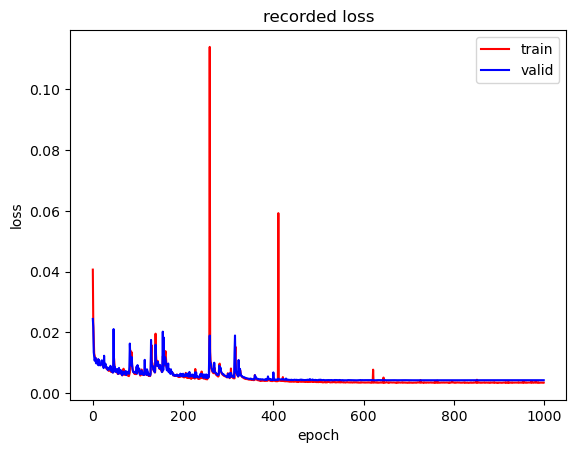

In [ ]:
loss_plot(trainloss, testloss)

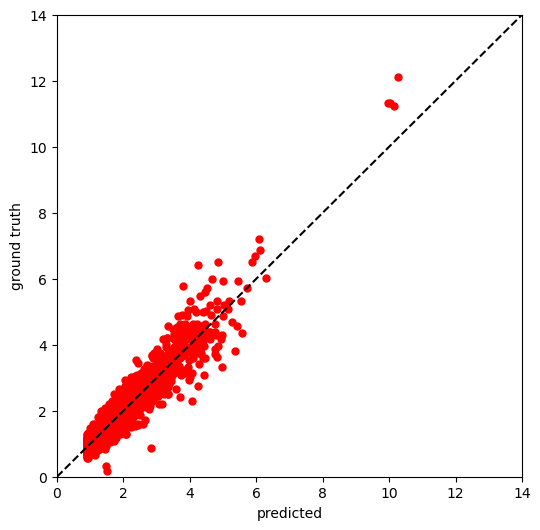

In [ ]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader, y_scaler_test)
true_pred_plot(pred_test, true_test)

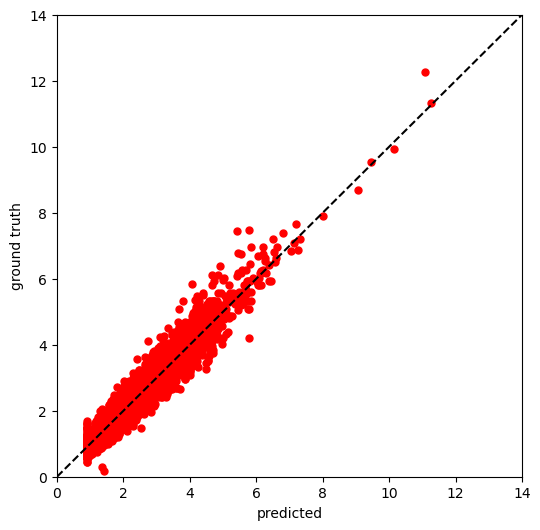

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader, y_scaler_train)
true_pred_plot(pred_train, true_train)